In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline

In [3]:
icedata = pd.read_json('train/data/processed/train.json')

In [4]:
icedata.head()

band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [5]:
icedata['band_1'].apply(lambda x: np.array(x).shape)

0       (5625,)
1       (5625,)
2       (5625,)
3       (5625,)
4       (5625,)
5       (5625,)
6       (5625,)
7       (5625,)
8       (5625,)
9       (5625,)
10      (5625,)
11      (5625,)
12      (5625,)
13      (5625,)
14      (5625,)
15      (5625,)
16      (5625,)
17      (5625,)
18      (5625,)
19      (5625,)
20      (5625,)
21      (5625,)
22      (5625,)
23      (5625,)
24      (5625,)
25      (5625,)
26      (5625,)
27      (5625,)
28      (5625,)
29      (5625,)
         ...   
1574    (5625,)
1575    (5625,)
1576    (5625,)
1577    (5625,)
1578    (5625,)
1579    (5625,)
1580    (5625,)
1581    (5625,)
1582    (5625,)
1583    (5625,)
1584    (5625,)
1585    (5625,)
1586    (5625,)
1587    (5625,)
1588    (5625,)
1589    (5625,)
1590    (5625,)
1591    (5625,)
1592    (5625,)
1593    (5625,)
1594    (5625,)
1595    (5625,)
1596    (5625,)
1597    (5625,)
1598    (5625,)
1599    (5625,)
1600    (5625,)
1601    (5625,)
1602    (5625,)
1603    (5625,)
Name: band_1, Length: 16

In [6]:
icedata['band_1'] = icedata['band_1'].apply(lambda x: np.array(x).reshape(75,75))

In [7]:
icedata['band_2'] = icedata['band_2'].apply(lambda x: np.array(x).reshape(75,75))

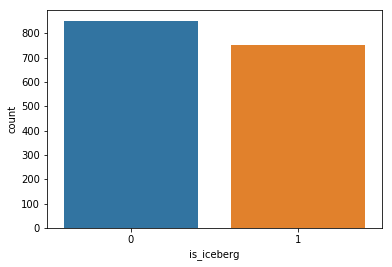

In [8]:
sns.countplot(icedata['is_iceberg'])

In [9]:
icedata.head()

band_1  \
0  [[-27.878361, -27.15416, -28.668615, -29.53797...   
1  [[-12.242375, -14.920305, -14.920363, -12.6663...   
2  [[-24.603676, -24.603714, -24.871029, -23.1527...   
3  [[-22.454607, -23.082819, -23.998013, -23.9980...   
4  [[-26.006956, -23.164886, -23.164886, -26.8911...   

                                              band_2        id inc_angle  \
0  [[-27.154118, -29.537888, -31.0306, -32.190483...  dfd5f913   43.9239   
1  [[-31.506321, -27.984554, -26.645678, -23.7676...  e25388fd   38.1562   
2  [[-24.870956, -24.092632, -20.653963, -19.4110...  58b2aaa0   45.2859   
3  [[-27.889421, -27.519794, -27.165262, -29.1035...  4cfc3a18   43.8306   
4  [[-27.206915, -30.259186, -30.259186, -23.1649...  271f93f4   35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

In [24]:
def miImShow(noofrows):
    rows = int((noofrows*2)/8)
    if(((noofrows*2)/8) > int((noofrows*2)/8)):
        rows = rows+1
    fig, axes = plt.subplots(rows, 8)
    if(rows == 1):
        emptyList = []
        emptyList.append(axes)
        axes = emptyList
    row = 0
    col = 0
    fig.set_figheight(int((rows+1)*3.2))
    fig.set_figwidth(20)
    for im in range(noofrows):
        if(rows == row):
            break
        axes[row][col].set_xticklabels([])
        axes[row][col].set_yticklabels([])
        axes[row][col].set_xlabel('b-1 '+icedata['id'].iloc[im])
        axes[row][col].imshow(icedata['band_1'].iloc[im], cmap='gray' )
        axes[row][col].set_aspect('equal')
            
        axes[row][col+1].set_xticklabels([])
        axes[row][col+1].set_yticklabels([])
        axes[row][col+1].set_xlabel('b-2 '+str(icedata['is_iceberg'].iloc[im]))
        axes[row][col+1].imshow(icedata['band_2'].iloc[im], cmap='gray')
        axes[row][col+1].set_aspect('equal')
        col = col + 2
        if(col == 8):
            col = 0
            row = row + 1
    fig.subplots_adjust(wspace=0, hspace=0)
    plt.savefig('initial'+str(int(time.time()))+'.png')
    #plt.show()

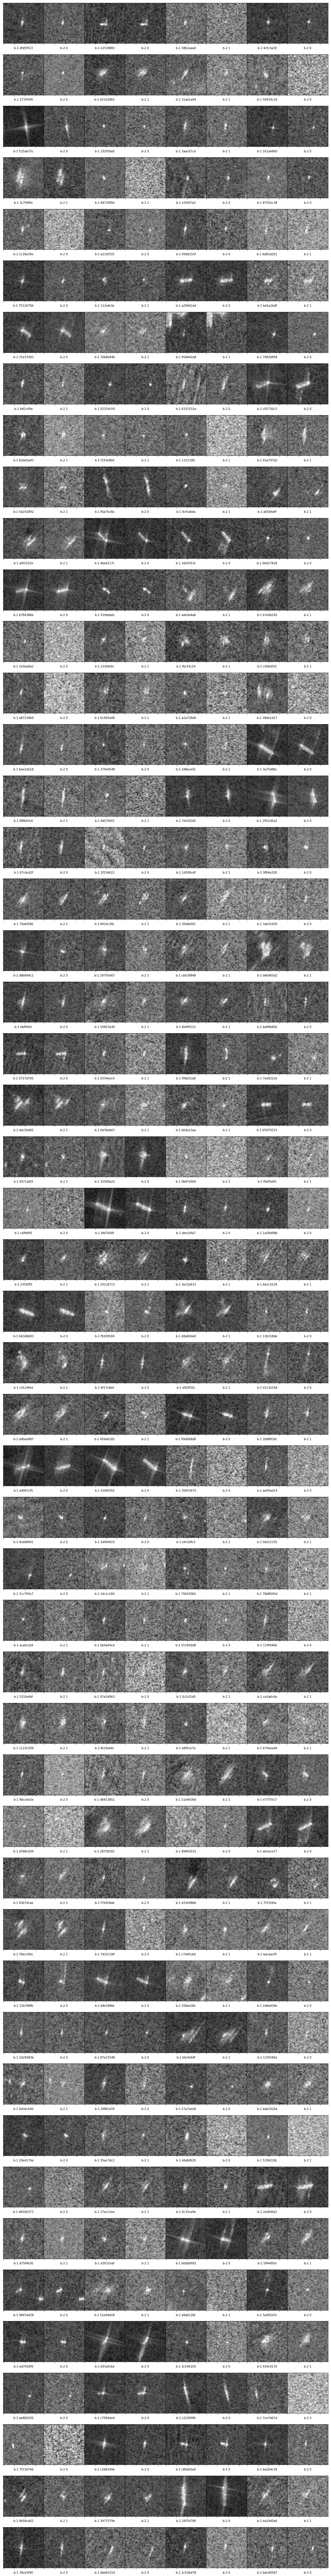

In [25]:
miImShow(200)